In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from plot_utils import *

%matplotlib inline

In [2]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', 
          '#f781bf', '#a65628', '#984ea3', 
          '#999999', '#e41a1c', '#dede00',
          '#006BA4', '#FF800E', '#ABABAB', 
          '#595959', '#5F9ED1', '#C85200',
          '#898989', '#A2C8EC', '#FFBC79', 
          '#CFCFCF']

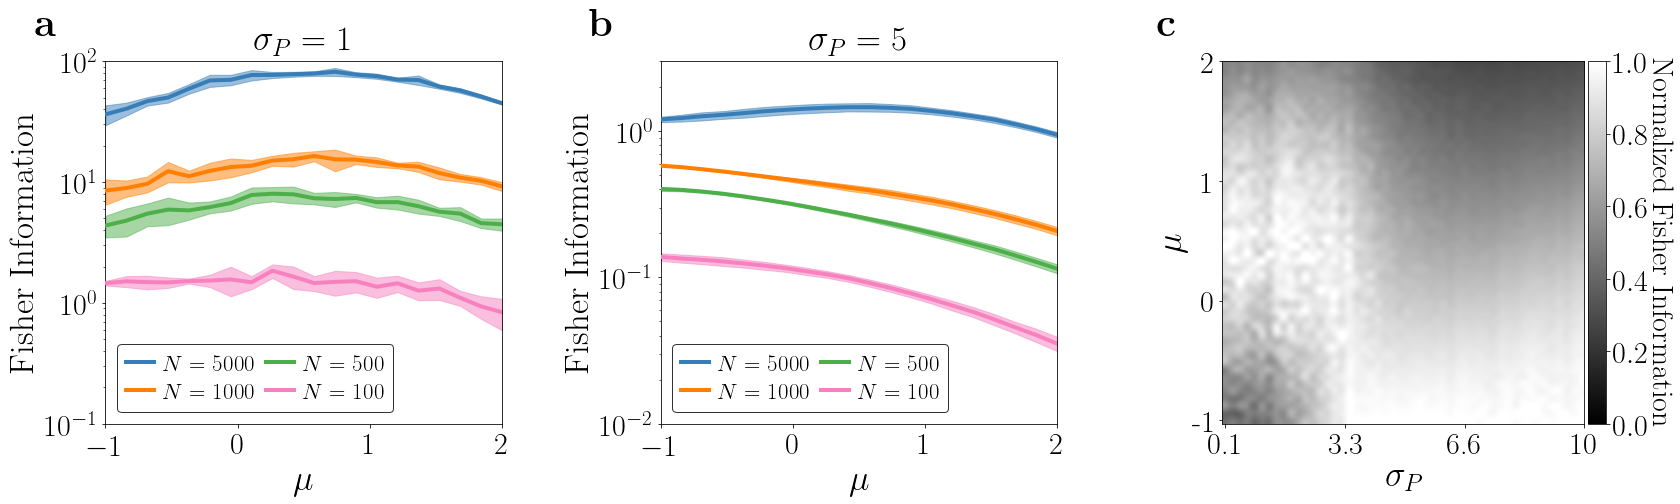

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(27, 6.67))

#fig = plt.figure(figsize=(20, 6))

#ax1 = fig.add_axes([0, 0, 0.3, 1.])
#ax2 = fig.add_axes([0.40, 0., 0.3, 1.])
#ax3 = fig.add_axes([0.80, 0., 0.3, 1.])

#axes = np.array([ax1, ax2, ax3])

# Figure 5a
unstruct_weight_plot_nonlinear_mu(
    Ns=np.array([5000, 1000, 500, 100]),
    mus=np.linspace(-1, 2, 20),
    sigma=1.,
    sigmaP=1.,
    repetitions=10,
    colors=colors,
    fax=(fig, axes[0]))

axes[0].set_xlim([-1, 2])
axes[0].set_ylim([0.1, 100])
axes[0].set_xlabel(r'$\mu$', fontsize=35)
axes[0].set_ylabel(r'Fisher Information', fontsize=35)
axes[0].set_title(r'$\sigma_P=1$', fontsize=35)
axes[0].set_ylim([0.1, 100])
axes[0].set_yscale('log')
axes[0].tick_params(labelsize=30)

lgd0 = axes[0].legend(
    ncol=2,
    facecolor='white', 
    prop={'size' : 23}, 
    handletextpad=0.4,
    handlelength=1.2,
    labelspacing=0.27,
    columnspacing=0.50)
lgd0.get_frame().set_edgecolor('k')

# Figure 5b
unstruct_weight_plot_nonlinear_mu(
    Ns=np.array([5000, 1000, 500, 100]),
    mus=np.linspace(-1, 2, 20),
    sigma=1.,
    sigmaP=5.,
    repetitions=1000,
    colors=colors,
    fax=(fig, axes[1]))

axes[1].set_xlim([-1, 2])
axes[1].set_ylim([0.01, 3])
axes[1].set_xlabel(r'$\mu$', fontsize=35)
axes[1].set_ylabel(r'Fisher Information', fontsize=35)
axes[1].set_title(r'$\sigma_P=5$', fontsize=35)
axes[1].set_yscale('log')
axes[1].tick_params(labelsize=30)

lgd1 = axes[1].legend(ncol=2,
                    facecolor='white', 
                    prop={'size' : 23}, 
                    handletextpad=0.4,
                    handlelength=1.2,
                    labelspacing=0.27,
                    columnspacing=0.50)
lgd1.get_frame().set_edgecolor('k')

# Figure 5c
ratios = np.linspace(0.1, 10, 50)
mus = np.linspace(-1, 2, 50)
img, _, _ = plot_unstructured_fisher_nonlinear_2d(
    N=1000,
    ratios=ratios,
    mus=mus,
    sigma=1.,
    sigmaC=1.,
    repetitions=10,
    colors=colors,
    fax=(fig, axes[2]))

axes[2].set_xlabel(r'$\sigma_P$', fontsize=35)
axes[2].set_ylabel(r'$\mu$', fontsize=35)
axes[2].set_xticks(ratios.size * np.array([0, 0.33, 0.66, 0.99]))
axes[2].set_xticklabels([0.1, 3.3, 6.6, 10])
axes[2].set_yticks(mus.size * np.array([0, 0.33, 0.66, 0.99]))
axes[2].set_yticklabels([-1, 0, 1, 2])
axes[2].tick_params(labelsize=30)
axes[2].axis('equal')

# create colorbar
cb = colorbar(img)
cb.ax.set_ylabel(r'Normalized Fisher Information', fontsize=30, labelpad=25, rotation=270)
cb.ax.tick_params(labelsize=30)
cb.ax.set_ylim([0, 1])

# Subplot labels
axes[0].text(
    x=-0.15, y=1.1, s=r'\textbf{a}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0].transAxes)

axes[1].text(
    x=-0.15, y=1.1, s=r'\textbf{b}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1].transAxes)

axes[2].text(
    x=-0.15, y=1.1, s=r'\textbf{c}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[2].transAxes)

plt.subplots_adjust(wspace=0.4)
plt.savefig('figure5.pdf')